In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [4]:
sample = 1000
T = 5
fs = sample / T

In [5]:
def H(f: np.array, n: int) -> np.array:
    H = np.ones_like(f, dtype=complex)
    for k in range(n // 2):
        a = np.sin(np.pi * (2*k + 1) / (2 * n))
        p_k = - f ** 2 + 2j * a * f + 1
        H = H / p_k
    if n % 2 == 1:
        H = H / (1j * f + 1)

    return H

In [6]:
def LPF(f, cutoff, order):
    half = H(f[:t.size // 2] / cutoff, order)
    return np.concatenate((half, np.flip(half)))

In [7]:
f0 = 1  # Hz
fs = 100  # freq_sample
MaxTime = 5  # s
NumOfSamples = int(np.floor(MaxTime * fs))

In [70]:
t = np.linspace(0, MaxTime, NumOfSamples, endpoint=False)
f = np.arange(NumOfSamples) * fs / NumOfSamples

S = 2
w_s = 1
s = S * np.sin(2 * np.pi * t * w_s)
# s = S * np.sin(2 * np.pi * t * w_s) + S * np.sin(2 * np.pi * t * 5 * w_s) + S * np.sin(2 * np.pi * t * 10 * w_s)

R = 1
w_r = 10
r = R * np.sin(2 * np.pi * t * w_r) + (R / 2)* np.sin(2 * np.pi * t * 23) + (R/3) * np.sin(2 * np.pi * t * 26)

m = 1
modul = r * (1 + m * s) 
# modul = R * np.sin(2 * np.pi * t * w_r) + (R / 2)* np.sin(2 * np.pi * t * 8) + (R/3) * np.sin(2 * np.pi * t * 11)
original_spectre = np.fft.fft(sr)
spectre = abs(np.fft.fft(s))

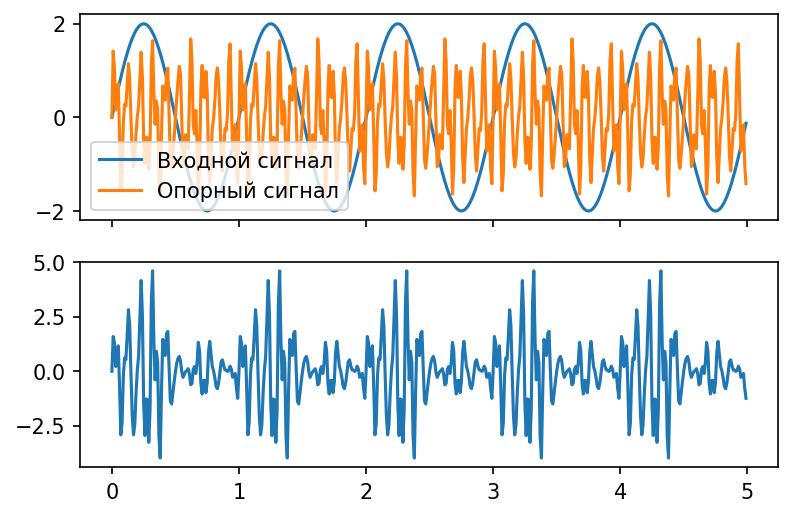

In [71]:
fg, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(t, s, label='Входной сигнал')
ax[0].plot(t, r, label='Опорный сигнал')
ax[0].legend(loc='best')

ax[1].plot(t, modul)

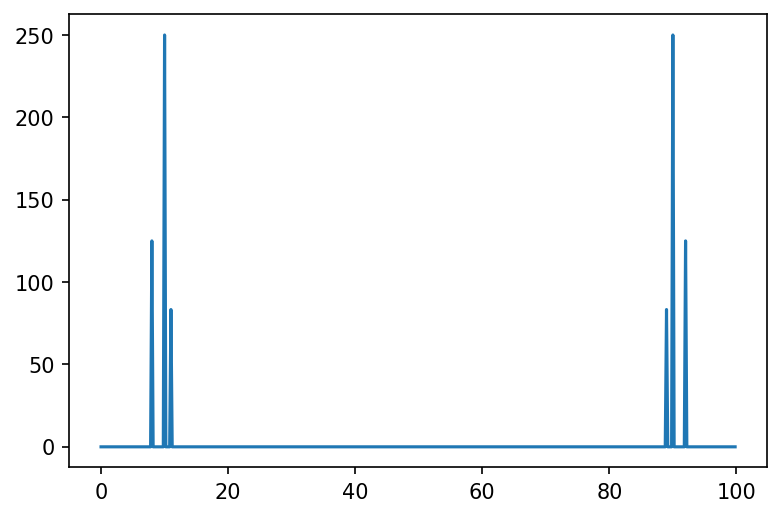

In [54]:
plt.plot(f, np.abs(np.fft.fft(modul)))

## Демодуляция

In [64]:
init_signal = modul

R = 3
w_r = 10
r1 = R * np.sin(2 * np.pi * t * w_r)
r2 = R * np.cos(2 * np.pi * t * w_r)

mul1 = init_signal * r1
mul2 = init_signal * r2

MUL1 = np.fft.fft(mul1)
MUL2 = np.fft.fft(mul2)

H_lpf = LPF(f, w_r, 7)
y_c = np.fft.ifft(MUL1 * H_lpf)
y_s = np.fft.ifft(MUL2 * H_lpf)

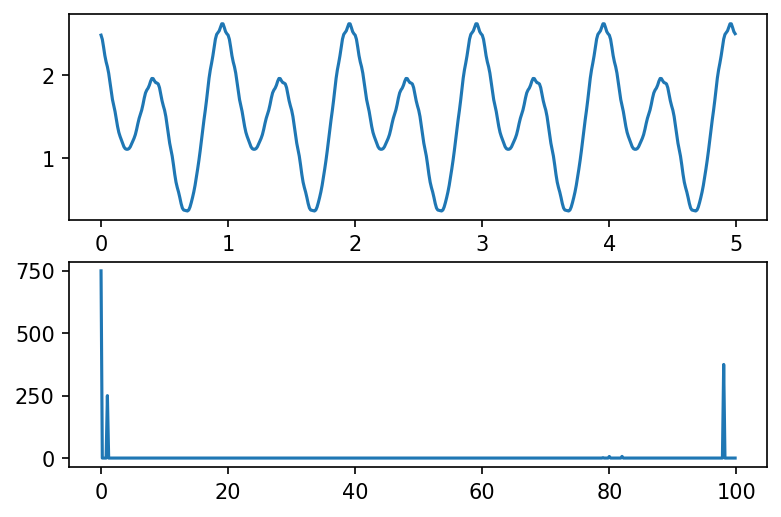

In [67]:
c = y_c + 1j * y_s

spectre = np.fft.fft(c)

fg, ax = plt.subplots(2, 1)

ax[0].plot(t, np.real(c))
ax[1].plot(f, np.abs(spectre))